In [59]:
%pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
import nltk

In [62]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rafi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import joblib
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [79]:
# Load dataset
df = pd.read_csv('smart_locker_reviews.csv', sep=";")

In [80]:
df

,review,sentiment
0,"Kualitas smart locker ini sangat buruk, sering...",Negative
1,Desain smart locker sangat modern dan menarik.,Positive
2,Smart locker ini memiliki fitur yang cukup sta...,Neutral
3,"Keamanan smart locker ini sangat tinggi, saya ...",Positive
4,Smart locker ini sering tidak bisa diakses saa...,Negative
...,...,...
1795,Face recognition sulit digunakan jika kondisi ...,Negative
1796,RFID pada smart locker ini sangat efisien.,Positive
1797,"Lokernya enggak buruk, tapi kadang ribet",Neutral
1798,"RFID-nya cukup responsif, tapi kadang lambat",Neutral


### Case Folding

In [81]:
# Ensure reviews are strings and lowercase
df['review'] = df['review'].astype(str).str.lower()

In [82]:
def clean_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    return text

df['cleaned_review'] = df['review'].apply(clean_text)

### Tokenizing

In [83]:
df['tokens'] = df['cleaned_review'].apply(word_tokenize)

### Stopword Removal

In [84]:
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['tokens'] = df['tokens'].apply(remove_stopwords)

### Stemming

In [85]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_tokenizer(text):
    return [stemmer.stem(word) for word in text]

df['tokens'] = df['tokens'].apply(stem_tokenizer)
df['processed_review'] = df['tokens'].apply(lambda x: ' '.join(x))

### Pembobotan TF-IDF

In [86]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.7, min_df=1, ngram_range=(1, 1))
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_review'])

In [87]:
# Menampilkan 10 kata dengan nilai IDF tertinggi
freqs = tfidf_matrix.sum(axis=0)
idf_values = tfidf_vectorizer.idf_
word_idf = dict(zip(tfidf_vectorizer.get_feature_names_out(), idf_values))

top_idf_words = sorted(word_idf.items(), key=lambda x: x[1], reverse=True)[:10]
for word, idf in top_idf_words:
    print(f'Kata: {word}, Kemunculan: {idf}')

Kata: adaptasi, Kemunculan: 7.802950164616011
Kata: aktif, Kemunculan: 7.802950164616011
Kata: area, Kemunculan: 7.802950164616011
Kata: bahan, Kemunculan: 7.802950164616011
Kata: beda, Kemunculan: 7.802950164616011
Kata: beli, Kemunculan: 7.802950164616011
Kata: bener, Kemunculan: 7.802950164616011
Kata: benerbener, Kemunculan: 7.802950164616011
Kata: biasabiasa, Kemunculan: 7.802950164616011
Kata: buangbuang, Kemunculan: 7.802950164616011


### klasifikasi SVM

In [195]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['sentiment'], test_size=0.2, random_state=20)

model = svm.SVC(C=1, kernel='rbf', gamma=1)
model.fit(X_train, y_train)
print(f"Accuracy : {model.score(X_test, y_test)}")

Accuracy : 0.8888888888888888


In [196]:
pred = model.predict(X_test)
pred

array(['Negative', 'Positive', 'Negative', 'Neutral', 'Negative',
       'Negative', 'Positive', 'Neutral', 'Negative', 'Positive',
       'Positive', 'Neutral', 'Negative', 'Neutral', 'Neutral',
       'Negative', 'Negative', 'Positive', 'Positive', 'Neutral',
       'Negative', 'Neutral', 'Positive', 'Positive', 'Negative',
       'Neutral', 'Negative', 'Negative', 'Neutral', 'Negative',
       'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive',
       'Negative', 'Negative', 'Negative', 'Neutral', 'Neutral',
       'Positive', 'Negative', 'Neutral', 'Positive', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Neutral', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Negative', 'Neutral', 'Neutral',
       'Positive', 'Positive', 'Neutral', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Neutral',
       'Positi

In [197]:
print(f"Accuracy : {model.score(X_test, y_test)}")

Accuracy : 0.8888888888888888


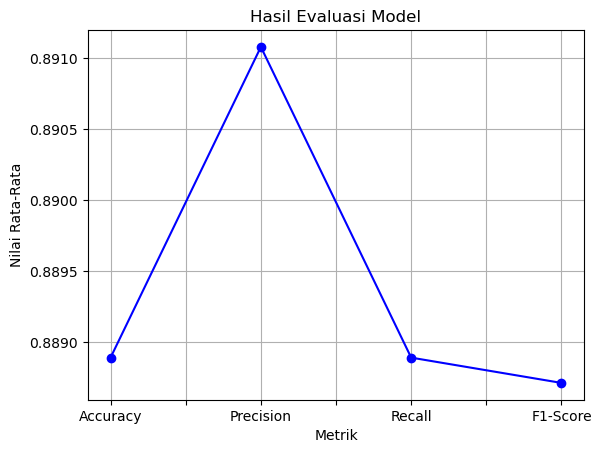

In [198]:
pred = model.predict(X_test)
acc_score = accuracy_score(y_test, pred) 
pre_score = precision_score(y_test, pred, average='weighted')
rec_score = recall_score(y_test, pred, average='weighted')
f_score = f1_score(y_test, pred, average='weighted')

scores = {
    'Accuracy': acc_score,
    'Precision': pre_score,
    'Recall': rec_score, 
    'F1-Score': f_score
}

eval_df = pd.DataFrame.from_dict(scores, orient='index', columns=['Score']) 

eval_df['Score'].plot(kind='line', marker='o', color='blue') 

plt.title('Hasil Evaluasi Model')
plt.xlabel('Metrik') 
plt.ylabel('Nilai Rata-Rata')
plt.grid(True) 

plt.show()

In [199]:
# Evaluasi pada training set
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluasi pada testing set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.9375
Training Classification Report:
              precision    recall  f1-score   support

    Negative       0.94      0.91      0.93       466
     Neutral       0.94      0.93      0.93       496
    Positive       0.94      0.97      0.95       478

    accuracy                           0.94      1440
   macro avg       0.94      0.94      0.94      1440
weighted avg       0.94      0.94      0.94      1440

Testing Accuracy: 0.8888888888888888
Testing Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.84      0.88       134
     Neutral       0.84      0.92      0.88       104
    Positive       0.90      0.92      0.91       122

    accuracy                           0.89       360
   macro avg       0.89      0.89      0.89       360
weighted avg       0.89      0.89      0.89       360



In [200]:
def preprocess_review(review):
    review = review.lower()
    tokens = word_tokenize(review)
    tokens = remove_stopwords(tokens)
    tokens = stem_tokenizer(tokens)
    return ' '.join(tokens)

def predict_sentiment(review):
    preprocessed_review = preprocess_review(review)
    tfidf_review = tfidf_vectorizer.transform([preprocessed_review])
    sentiment = model.predict(tfidf_review)
    return sentiment[0]

In [203]:
new_reviews = [
    "gagal",
    "ini bagus banget",
    "lumayan lah ya",
    "pintunya tidak bisa dibuka",
    "face detection tidak berfungsi",
    "loker sulit digunakan",
    "ini keren banget kak",
    "bagus tapi perlu ditingkatkan lagi agar lebih baik",
    "loker nya enggak bagus"
]
for review in new_reviews:
    sentiment = predict_sentiment(review)
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Review: gagal
Predicted Sentiment: Negative

Review: ini bagus banget
Predicted Sentiment: Positive

Review: lumayan lah ya
Predicted Sentiment: Neutral

Review: pintunya tidak bisa dibuka
Predicted Sentiment: Negative

Review: face detection tidak berfungsi
Predicted Sentiment: Negative

Review: loker sulit digunakan
Predicted Sentiment: Negative

Review: ini keren banget kak
Predicted Sentiment: Positive

Review: bagus tapi perlu ditingkatkan lagi agar lebih baik
Predicted Sentiment: Neutral

Review: loker nya enggak bagus
Predicted Sentiment: Negative



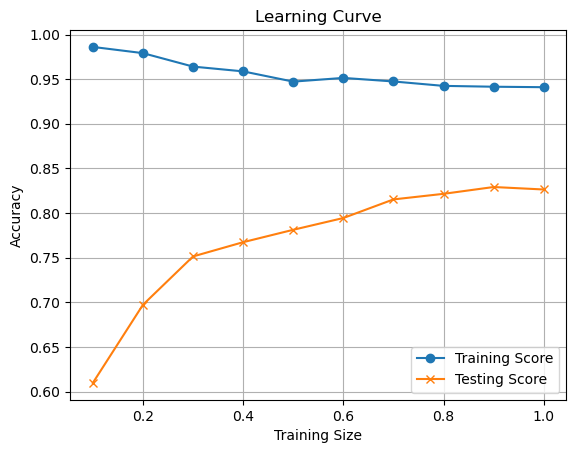

In [204]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_scores, test_scores = [], []
    for train_size in train_sizes:
        _, train_score, test_score = learning_curve(estimator, X, y, cv=cv, train_sizes=[train_size])
        train_scores.append(train_score.mean())
        test_scores.append(test_score.mean())
    plt.plot(train_sizes, train_scores, label='Training Score', marker='o')
    plt.plot(train_sizes, test_scores, label='Testing Score', marker='x')
    plt.title('Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

X_train, X_val, y_train, y_val = train_test_split(tfidf_matrix, df['sentiment'], test_size=0.2, random_state=20)
model = svm.SVC(C=1, kernel='rbf', gamma=1)

plot_learning_curve(model, X_train, y_train, cv=5)
plt.show()

In [205]:
joblib.dump(model, 'sentiment.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

### Find Best Parameters

In [99]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'tfidf__max_df': [0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
    'tfidf__min_df': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.01, 0.1, 1],
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

In [100]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', svm.SVC())
])

In [102]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(df['processed_review'], df['sentiment'])

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10], 'svm__gamma': [0.01, 0.1, 1],
                         'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'tfidf__max_df': [0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
                         'tfidf__min_df': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             verbose=2)

In [103]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'svm__C': 1, 'svm__gamma': 1, 'svm__kernel': 'rbf', 'tfidf__max_df': 0.7, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)}
Best cross-validation score:  0.8099999999999999


In [104]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'tfidf__max_df': [0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
    'tfidf__min_df': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'svm__C': np.logspace(-2, 1, 4),
    'svm__gamma': np.logspace(-2, 1, 4),
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

In [105]:
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=4320, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(df['processed_review'], df['sentiment'])

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('svm', SVC())]),
                   n_iter=4320, n_jobs=-1,
                   param_distributions={'svm__C': array([ 0.01,  0.1 ,  1.  , 10.  ]),
                                        'svm__gamma': array([ 0.01,  0.1 ,  1.  , 10.  ]),
                                        'svm__kernel': ['linear', 'rbf', 'poly',
                                                        'sigmoid'],
                                        'tfidf__max_df': [0.7, 0.75, 0.8, 0.85,
                                                          0.9, 0.95],
                                        'tfidf__min_df': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10],
                                        'tfidf__ngram_range': [(1, 1), (1, 2)]},
                   random_state=42, verbose=2)

In [106]:
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

Best parameters found:  {'tfidf__ngram_range': (1, 1), 'tfidf__min_df': 1, 'tfidf__max_df': 0.7, 'svm__kernel': 'rbf', 'svm__gamma': 1.0, 'svm__C': 1.0}
Best cross-validation score:  0.8099999999999999
